<h3>Importing the packages</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df1 = pd.read_csv('archive/heart.csv')
df2 = pd.read_csv('archive/o2Saturation.csv', names=["o2Saturation"])

<h3>Importing the data</h3>

In [3]:
print(df1.shape)
print(df2.shape)

(303, 14)
(3586, 1)


In [4]:
df = df1.merge(df2, left_index=True, right_index=True)
df.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.6
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,98.1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,97.5
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,97.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    int64  
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  output        303 non-null    int64  
 14  o2Saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'o2Saturation'],
      dtype='object')

In [7]:
df.rename(columns={
    "cp": "chest_pain",
    "trtbps": "blood_pressure",
    "chol": "cholestrol",
    "fbs": "fasting_blood_sugar",
    "thalachh": "max_heart_rate",
    "exng": "angina",
    "caa": "n_vessels",
    "output": "heart_attack"},
         inplace=True)

df['sex'].replace({0:"Female", 1:"Male"}, inplace=True)

li = df.columns.to_list()
li[0], li[1], li[-2], li[-1] = li[1], li[0], li[-1], li[-2]
df = df[li]

df.head()

,sex,age,chest_pain,blood_pressure,cholestrol,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,o2Saturation,heart_attack
0,Male,63,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,Male,37,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,Female,41,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,Male,56,1,120,236,0,1,178,0,0.8,2,0,2,98.6,1
4,Female,57,0,120,354,0,1,163,1,0.6,2,0,2,98.1,1


<h3>Summary Statistics</h3>

In [8]:
con_cols = ['age', 'blood_pressure', 'cholestrol', 'max_heart_rate', 'o2Saturation']
df[con_cols].describe()

,age,blood_pressure,cholestrol,max_heart_rate,o2Saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,97.484488
std,9.082101,17.538143,51.830751,22.905161,0.352649
min,29.000000,94.000000,126.000000,71.000000,96.500000
25%,47.500000,120.000000,211.000000,133.500000,97.500000
50%,55.000000,130.000000,240.000000,153.000000,97.500000
75%,61.000000,140.000000,274.500000,166.000000,97.500000
max,77.000000,200.000000,564.000000,202.000000,98.600000


<h3>EDA</h3>

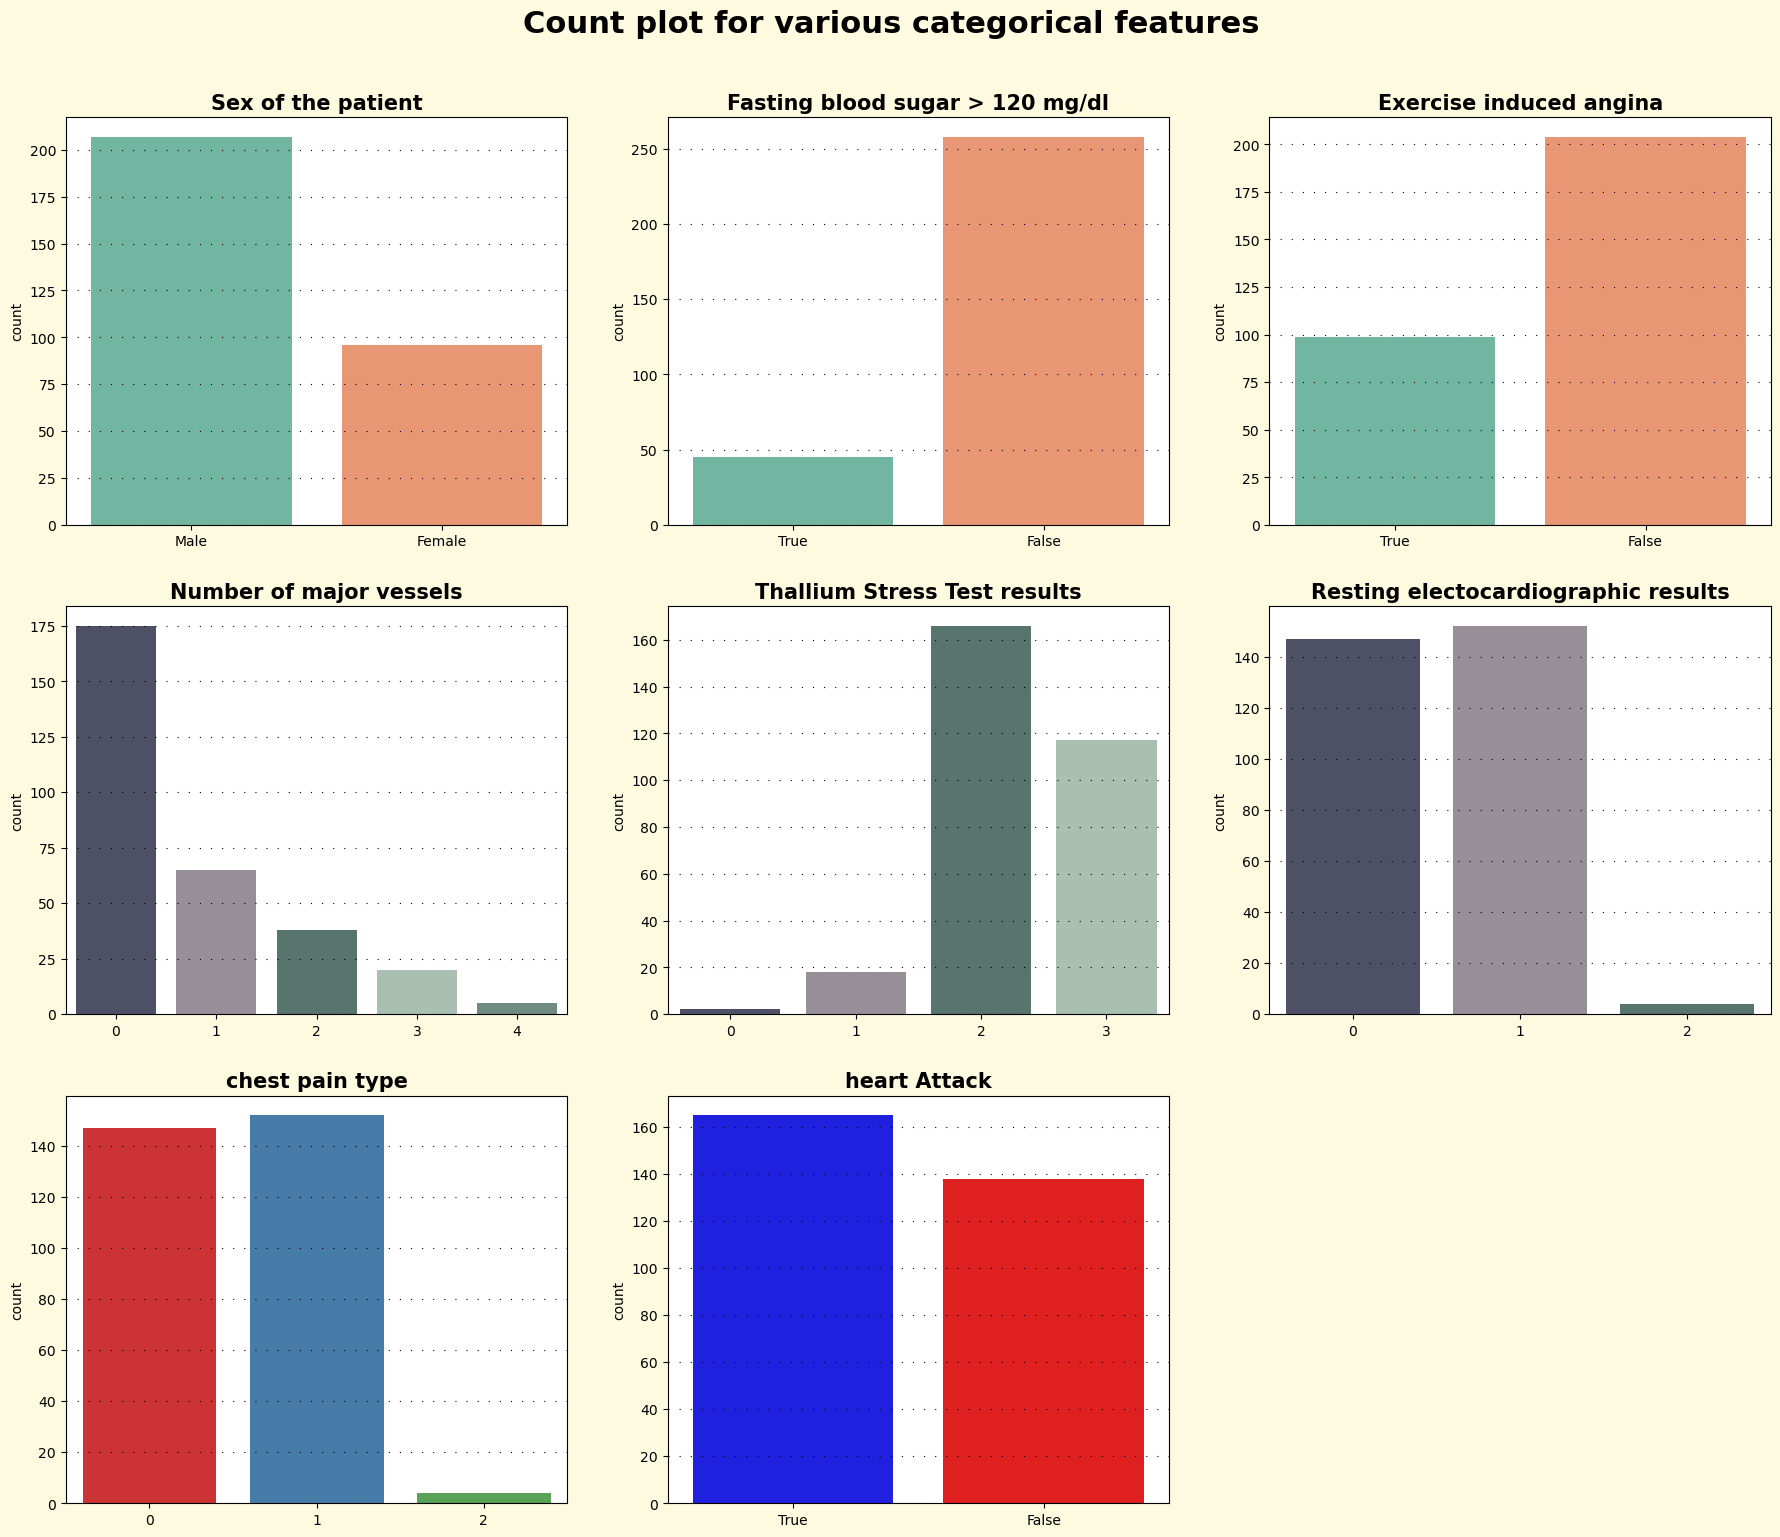

In [9]:
fig = plt.figure(figsize=(22, 18))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1])

fig.suptitle(t="Count plot for various categorical features", y=0.94, fontweight="bold", fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

# Sex
ax1.set_title('Sex of the patient', fontweight="bold", fontsize=15)
ax1.grid(color="#000000", linestyle='dashed', axis='y', dashes=(1,9))
sns.countplot(ax=ax1, data=df, x='sex', palette='Set2')
ax1.set_xlabel("")

# fasting blood sugar
ax2.set_title('Fasting blood sugar > 120 mg/dl', fontweight="bold", fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='y', dashes=(1,9))
sns.countplot(ax=ax2, data=df, x='fasting_blood_sugar', order=[True, False], palette='Set2')
ax2.set_xlabel("")

# angina
ax3.set_title('Exercise induced angina', fontweight="bold", fontsize=15)
ax3.grid(color="#000000", linestyle='dashed', axis='y', dashes=(1, 9))
sns.countplot(ax=ax3, data=df, x='angina', order=[True, False], palette='Set2')
ax3.set_xlabel("")

# numbers of vessels
ax4.set_title('Number of major vessels', fontweight="bold", fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='y', dashes=(1, 9))
sns.countplot(ax=ax4, data=df, x='n_vessels', palette=color_platte)
ax4.set_xlabel("")

# thall
ax5.set_title('Thallium Stress Test results', fontweight="bold", fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='y', dashes=(1,9))
sns.countplot(ax=ax5, data=df, x='thall', palette=color_platte)
ax5.set_xlabel("")

# restecg
ax6.set_title('Resting electocardiographic results', fontweight="bold", fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='y', dashes=(1,9))
sns.countplot(ax=ax6, data=df, x='restecg', palette=color_platte)
ax6.set_xlabel("")

# chest pain
leges={0:'typical angina', 1:'atypical angina', 2:'non-anginal pain',3:'asymptomatic'}
ax7.set_title('chest pain type', fontweight="bold", fontsize=15)
ax7.grid(color='#000000', linestyle='dashed', axis='y', dashes=(1,9))
sns.countplot(ax=ax7, data=df.assign(chest_pain = df['chest_pain'].replace(leges)), x='restecg', palette='Set1')
ax7.set_xlabel("")

# Heart Attack
ax8.set_title('heart Attack', fontweight="bold", fontsize=15)
ax8.grid(color="#000000", linestyle='dashed', axis='y', dashes=(1, 9))
sns.countplot(ax=ax8, data=df, x='heart_attack', order=[True, False], palette=['blue', 'red'])
ax8.set_xlabel("")
plt.show()

<h3>Distribution of continous features according to target variable</h3>

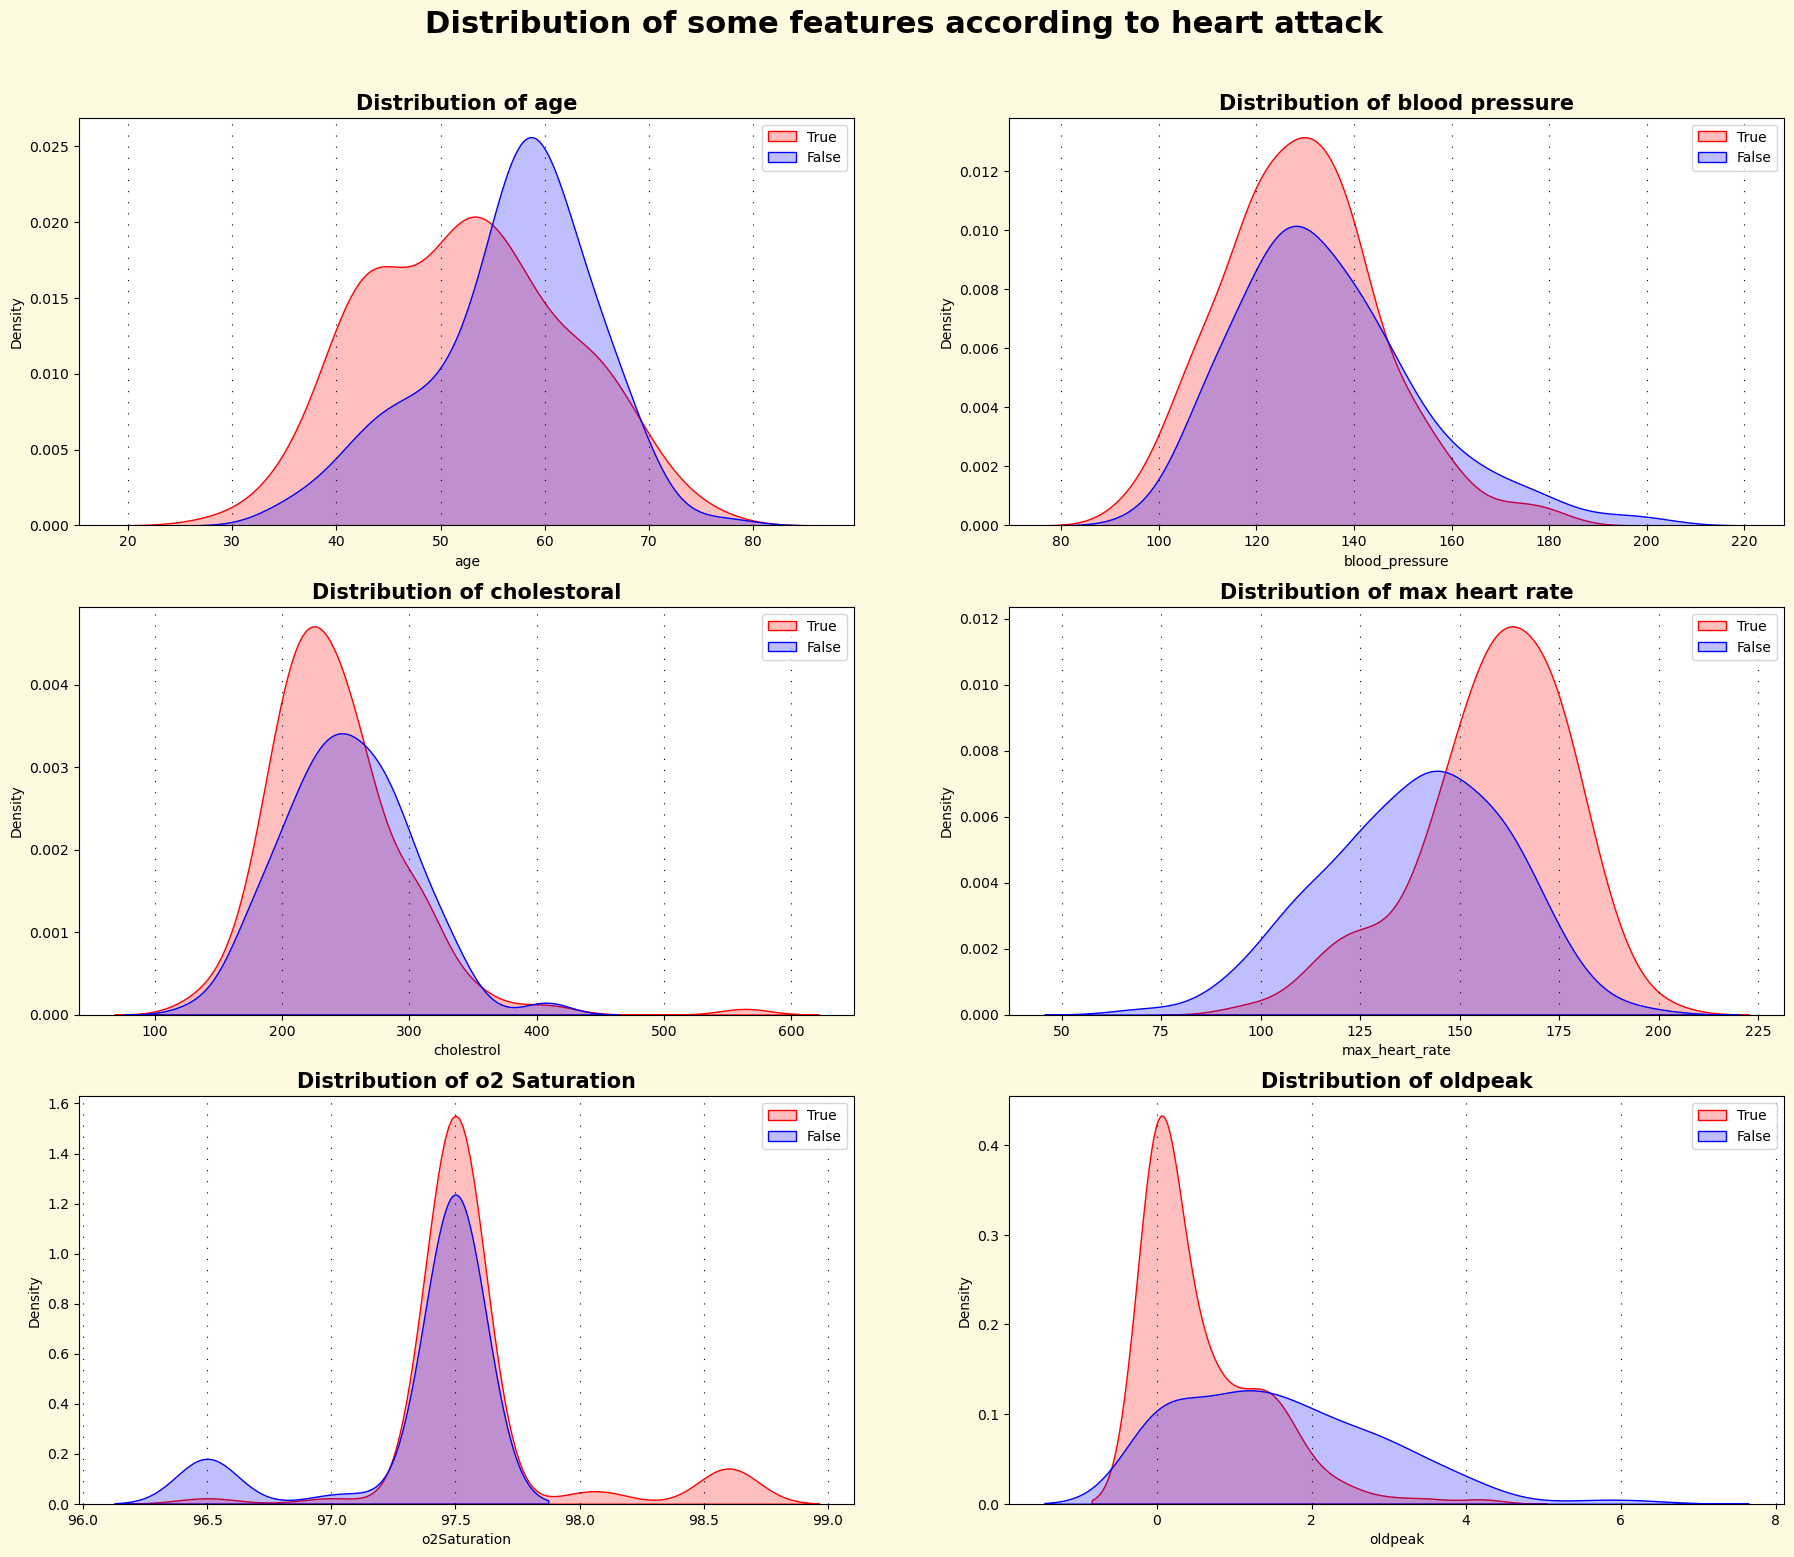

In [10]:
fig = plt.figure(figsize=(22, 18))
gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

fig.suptitle(t="Distribution of some features according to heart attack", y=0.94, fontweight="bold", fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

# age
ax1.set_title('Distribution of age', fontweight="bold", fontsize=15)
ax1.grid(color="#000000", linestyle='dashed', axis='x', dashes=(1, 9))
sns.kdeplot(ax=ax1, data=df, x='age', hue='heart_attack', fill=True, palette=['blue', 'red'])
ax1.legend([True, False])

# blood_pressure
ax2.set_title('Distribution of blood pressure', fontweight="bold", fontsize=15)
ax2.grid(color="#000000", linestyle='dashed', axis='x', dashes=(1, 9))
sns.kdeplot(ax=ax2, data=df, x='blood_pressure', hue='heart_attack', fill=True, palette=['blue', 'red'])
ax2.legend([True, False])

# cholestoral 
ax3.set_title('Distribution of cholestoral',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax3,data=df,x='cholestrol', hue='heart_attack', fill=True, palette = ['blue','red'])
ax3.legend([True, False])

# blood_pressure 
ax4.set_title('Distribution of max heart rate',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax4,data=df,x='max_heart_rate', hue='heart_attack', fill=True, palette = ['blue','red'])
ax4.legend([True, False])

# o2Saturation 
ax5.set_title('Distribution of o2 Saturation',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax5,data=df,x='o2Saturation', hue='heart_attack', fill=True, palette = ['blue','red'])
ax5.legend([True, False])

# oldpeak 
ax6.set_title('Distribution of oldpeak',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax6,data=df,x='oldpeak', hue='heart_attack', fill=True, palette = ['blue','red'])
ax6.legend([True, False])

plt.show()

<h3>Corelation between featurees and heart attack</h3>

In [11]:
df_corr = df.assign(sex = df['sex'].replace({'Female':0, 'Male':1})).corr()
df_corr['heart_attack']

sex                   -0.280937
age                   -0.225439
chest_pain             0.433798
blood_pressure        -0.144931
cholestrol            -0.085239
fasting_blood_sugar   -0.028046
restecg                0.137230
max_heart_rate         0.421741
angina                -0.436757
oldpeak               -0.430696
slp                    0.345877
n_vessels             -0.391724
thall                 -0.344029
o2Saturation           0.313584
heart_attack           1.000000
Name: heart_attack, dtype: float64

<h3>Modeling</h3>
</br>Importing Packages

In [12]:
# Scalling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC

In [13]:
X = df.assign(sex=df['sex'].replace({'Female':0, 'Male':1})).drop('heart_attack', axis=1)
y = df['heart_attack']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(x_train)
print(y_train)

     sex  age  chest_pain  blood_pressure  cholestrol  fasting_blood_sugar  \
132    1   42           1             120         295                    0   
202    1   58           0             150         270                    0   
196    1   46           2             150         231                    0   
75     0   55           1             135         250                    0   
176    1   60           0             117         230                    1   
..   ...  ...         ...             ...         ...                  ...   
188    1   50           2             140         233                    0   
71     1   51           2              94         227                    0   
106    1   69           3             160         234                    1   
270    1   46           0             120         249                    0   
102    0   63           1             140         195                    0   

     restecg  max_heart_rate  angina  oldpeak  slp  n_vessels  

<h3>Build Support Vector Machine(SVM)</h3>

In [15]:
# mdl = make_pipeline(StandardScaler(), LogisticRegression())
# mdl = make_pipeline(StandardScaler(), RidgeClassifier())
# mdl = make_pipeline(StandardScaler(), KNeighborsClassifier())
mdl = make_pipeline(StandardScaler(), SVC())
# SVC gives the best result


mdl.fit(x_train, y_train)
y_pred = mdl.predict(x_test)

<h3>Validation</h3>
</br>Get classification report

In [16]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.94        29\n           1       1.00      0.88      0.93        32\n\n    accuracy                           0.93        61\n   macro avg       0.94      0.94      0.93        61\nweighted avg       0.94      0.93      0.93        61\n'

<h3>Evaluating Score Train Dataset by Model</h3>

In [17]:
print('Score TrainDataSet: ', mdl.score(x_train, y_train))

Score TrainDataSet:  0.9421487603305785


<h3>Evaluating Score Test Dataset by Model</h3>

In [18]:
print('Score TestDataSet: ', mdl.score(x_test, y_test))

Score TestDataSet:  0.9344262295081968


In [19]:
print('Accuracy score of SVM is: ', accuracy_score(y_test, y_pred))

Accuracy score of SVM is:  0.9344262295081968
